<a href="https://colab.research.google.com/github/CoWoGeo/PUS2022_CWolk/blob/main/HW/HW5/timeSeriesClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis on population trends

Italicized text is Fed's original text.

*You are clustering the "shape" of time series to find trends, specifically, population growth trends. Do any countries stand out in the population growth trends in the past 60 years? are there groups of countries that have similar trends (and why?)*

In [208]:
# imports:
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import preprocessing
from sklearn import cluster

pl.rcParams['font.size'] = 18

In [209]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data processing

## Get the data

*You are going to have to skip some rows (`skiprows=`) and ideally only use relevant columns (the country name and each year column from 1960, you can use `usecold=` or you can read everything in then throw away the columns you do not need).*

I didn't use the skiprows command...is that okay?

*Finally, set the country name as the index for this dataframe. you can do that with `set_index()` passing the relevant column name as the argument (dont forget that you want to do it inplace! `inplace=True`)*

*do this to read an excel file with python
then restart the notebook*
Why does it need to be restarted?

In [210]:
#mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
cd /content/drive/Shareddrives/PUS2022

/content/drive/Shareddrives/PUS2022


In [212]:
#listing data in that folder
ls data

'2010 Census Tracts'/
 array_cholera_data.npy
 array_pump_data.npy
 citibike/
 Longitude_Graticules_and_World_Countries_Boundaries-shp/
 natural_earth_vector/
 NYC_Women_s_Resource_Network_Database.csv
 seeds_dataset.gdoc
 seeds_dataset.txt
'SP.POP.TOTL?downloadformat=excel'


In [213]:
#reading in the data. I went back in and set the header in this command.
pop_df = pd.read_excel("data/SP.POP.TOTL?downloadformat=excel", header=3)
                       
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


##Data Cleaning 


In [214]:
pop_df.drop(columns=["Country Code", "Indicator Name", "Indicator Code"], inplace=True)

In [215]:
pop_df.index

RangeIndex(start=0, stop=266, step=1)

In [216]:
pop_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


*You are going to have to skip some rows (skiprows=) and ideally only use relevant columns (the country name and each year column from 1960, you can use usecold= or you can read everything in then throw away the columns you do not need).*

In [217]:
#dropping NaN
pop_df_clean = pop_df.dropna(axis="columns", how ="all")
pop_df_clean = pop_df_clean.dropna(axis="rows", how="any")
pop_df_clean.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [218]:
# changing the index to country
pop_df_clean.set_index("Country Name", inplace=True)

In [219]:
pop_df_clean.shape

(262, 61)

In [220]:
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


## Scaling (standardizing)

*Standardize the data: you are working with time series so you want each datapoint (=each country) to be mean 0 and standard deviaion 1 along the rows (that is axis 1)

You can use the `preprocessing.scale` function. Make sure you check! you want eavery country mean to be 0 and every country standard deviation to be 1.*

In [221]:
# current standard deviations
pop_df_clean.std(axis=1)

Country Name
Aruba                          1.949524e+04
Africa Eastern and Southern    1.601030e+08
Afghanistan                    9.027728e+06
Africa Western and Central     1.062335e+08
Angola                         8.121128e+06
                                   ...     
Kosovo                         3.068811e+05
Yemen, Rep.                    7.742207e+06
South Africa                   1.297606e+07
Zambia                         4.396429e+06
Zimbabwe                       3.404663e+06
Length: 262, dtype: float64

In [222]:
# current means
pop_df_clean.mean(axis=1)

Country Name
Aruba                          7.676846e+04
Africa Eastern and Southern    3.363310e+08
Afghanistan                    1.869939e+07
Africa Western and Central     2.287737e+08
Angola                         1.413545e+07
                                   ...     
Kosovo                         1.595687e+06
Yemen, Rep.                    1.400506e+07
South Africa                   3.699079e+07
Zambia                         8.775118e+06
Zimbabwe                       9.491677e+06
Length: 262, dtype: float64

In [224]:
# doing the preprocessing!
pop_standard = preprocessing.scale(pop_df_clean, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


In [262]:
# this step was to help Liz troubleshoot
pop_standard

array([[-1.16683255, -1.10342353, -1.06204733, ...,  1.50389765,
         1.52789585,  1.55148028],
       [-1.29416451, -1.27323674, -1.25147869, ...,  1.93191198,
         2.03869861,  2.14700229],
       [-1.08365543, -1.06439588, -1.04406444, ...,  2.06318006,
         2.16033116,  2.25935293],
       ...,
       [-1.54561724, -1.51261636, -1.47833313, ...,  1.61638842,
         1.67589043,  1.73420169],
       [-1.30826109, -1.28680587, -1.26471651, ...,  1.9669992 ,
         2.08380917,  2.2037387 ],
       [-1.69251013, -1.65449631, -1.61476125, ...,  1.46510587,
         1.52630902,  1.59070854]])

How would you do this the long way like in class?

In [197]:
# new mean is basically 0
pop_standard.mean()

-1.1381487946100966e-16

In [195]:
# new standard deviation is 1
pop_standard.std()

1.0

## Visualize the data

make a plot of the time series before scaling, and after scaling. What do you see in the scaled version that was lost before? Dont forget to write a caption!

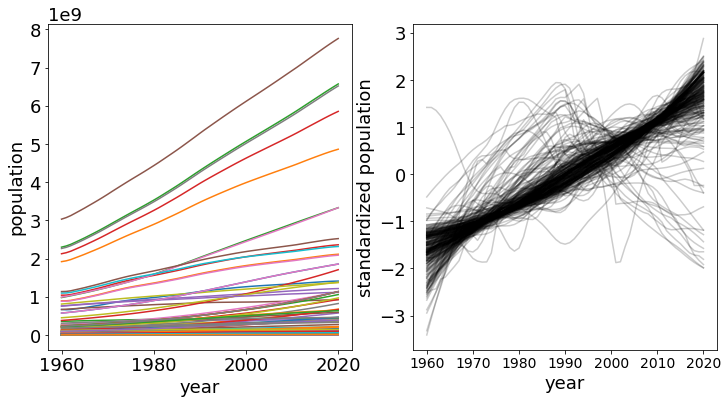

In [273]:
# looking at the data
fig, ax = pl.subplots(1,2, figsize=(12,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
ax[1].plot(pop_standard.T, color="k", alpha=0.2)

ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[0].set_xticks
ax[1].set_xlabel("year")
ax[1].set_ylabel("standardized population")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)], fontsize=14);

Fig. 1:...

# Make a cluster model with KMeans
Use kmeans (`sklearn.cluster.KMeans`) to cluster the data. Make 9 models for number of clusters = 2, 3, 4, 5, 6, 7, 8, 9, 10. 

For each model, fit the data and calculate the "inertia" which is 

In [233]:
#2-cluster Model
model = cluster.KMeans(n_clusters = 2)
model.fit(pop_standard)
model.inertia_

1249.5287124898719

In [234]:
#3-cluster Model
model = cluster.KMeans(n_clusters = 3)
model.fit(pop_standard)
model.inertia_

846.602551696185

In [235]:
#4-cluster Model
model = cluster.KMeans(n_clusters = 4)
model.fit(pop_standard)
model.inertia_

642.5573192964408

In [238]:
#5-cluster Model
model = cluster.KMeans(n_clusters = 5)
model.fit(pop_standard)
model.inertia_

561.2284111940547

In [239]:
#6-cluster Model
model = cluster.KMeans(n_clusters = 6)
model.fit(pop_standard)
model.inertia_

487.6079044788718

In [240]:
#7-cluster model
model = cluster.KMeans(n_clusters = 7)
model.fit(pop_standard)
model.inertia_

423.9379610827915

In [241]:
#8-cluster model
model = cluster.KMeans(n_clusters = 7)
model.fit(pop_standard)
model.inertia_

421.72005823352316

In [242]:
#9-cluster model
model = cluster.KMeans(n_clusters = 9)
model.fit(pop_standard)
model.inertia_

341.3170606660867

In [243]:
#10-cluster model
model = cluster.KMeans(n_clusters = 10)
model.fit(pop_standard)
model.inertia_

319.7137156595737

# Using an elbow plot to figure out ideal cluster _n_ 

Using the "inertia" (intracluster variance essentially) to make an elbow plot to choose cluster n.
I used this website to figure out the code and mostly(?) understand what I was doing: https://stackabuse.com/k-means-clustering-with-scikit-learn/

In [279]:
#broke this down into a list first based on an online example. I also changed
#the range to 2-11 to match the clusters above.
inertia = []
for i in range(2, 11): 
  kmeans = cluster.KMeans(n_clusters = i)
  kmeans.fit(pop_standard)
  inertia.append(kmeans.inertia_)
inertia

[1249.5287124898719,
 846.602551696185,
 642.5573192964408,
 561.2284111940547,
 487.0693567314296,
 421.329495685873,
 373.6960589446374,
 345.60321614800176,
 320.7744200201663]

# Figure 2: "Elbow plot" of k-means clustering of our time series.



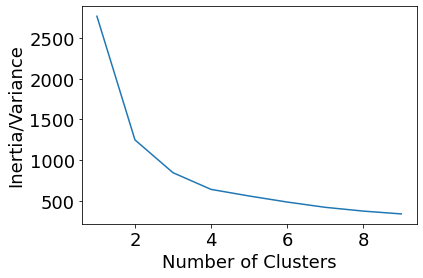

In [284]:
inertia = []
for i in range(1, 10): 
  kmeans = cluster.KMeans(n_clusters = i)
  kmeans.fit(pop_standard)
  inertia.append(kmeans.inertia_)
pl.plot(range(1, 10), inertia)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");

I realized my plot didn't look like Fed's with the given range. But changing the range to 1,10 made it the same as hers.
Y axis: sum of squared distances to the closet centroid ("inertia" in scikit, "variance" in Fedkit).
The preferred number of clusters is where the inertia/variance dramatically drops. There isn't an obvious point between 3 and 5. I would use 3 to be *~different*~ from Fed, but that is too small, and 5 seems too similar to 4. So 4 it is!

## Plotting data for my 4-cluster model

In [303]:
# time for a k-means cluster!!
c = cluster.KMeans(n_clusters = 4)
c.fit(pop_standard)
label_ = c.fit_predict(pop_standard)

In [304]:
label_

array([0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3,
       0, 2, 3, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 3, 0, 3, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 3,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 3, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2],
      dtype=int32)

## Figure 3: Plot of each cluster in a 4-cluster model

This is where I absolutely could not figure out how to get the plots to work. I understand the concept and maybe if my brain were fresher, I could figure out the code, but I only made a little progress. Every example I could find was with scatterplots, though some of them helped get a little closer. I couldn't build from here.

TypeError: ignored

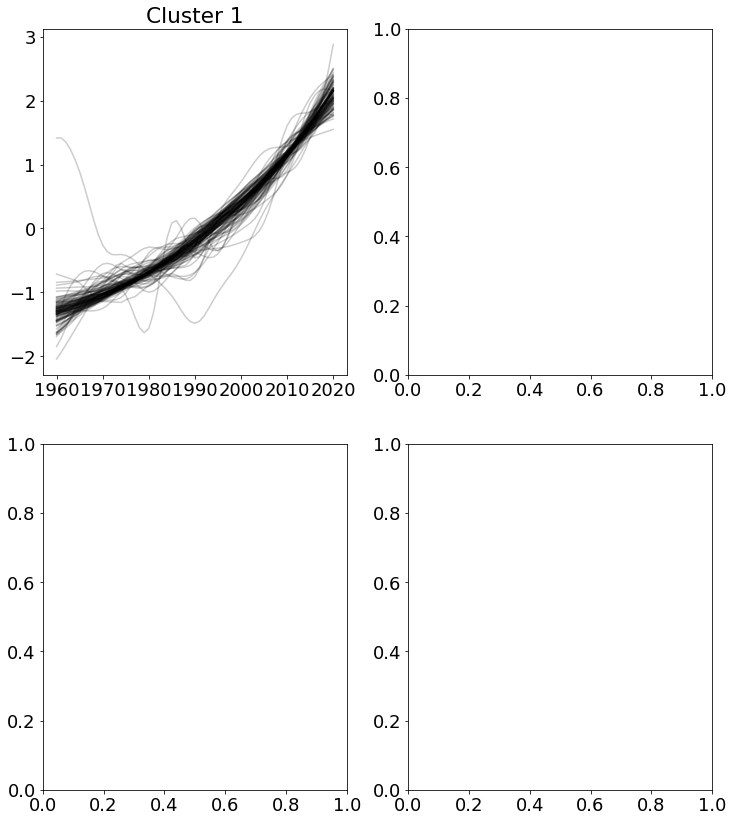

In [314]:
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[label_ == 0].T, "k", alpha=0.2);
ax[0,0].plot(c[0][0], color="hotpink")

The below is all Fed's language:

*Figure 3: Results of using k-means clustering on the standardized data seen in Figure 1. The mean line for each cluster is visible in pink.

Cluster 1 is a a fairly linear upward trend with some outliers and cluster 4 a more curved upward trend. Cluster 2 and cluster 4 have fewer time series; 2 rises steadily before a big drop in the 1990s whereas the countries in 3 kind of hit a plateau around the 1990s.*

# How many objects are in each cluster?

In [ ]:
for i in range(...):
  print ("total items in cluster {:d}: {:d}".format(
      i+1, np.sum(c[1] == i)))

# Identifying the countries in the smallest clusters

plot the two smallest clusters with labels for the countries

## Figure 4: Countries in the Two Smallest Clusters

TypeError: ignored

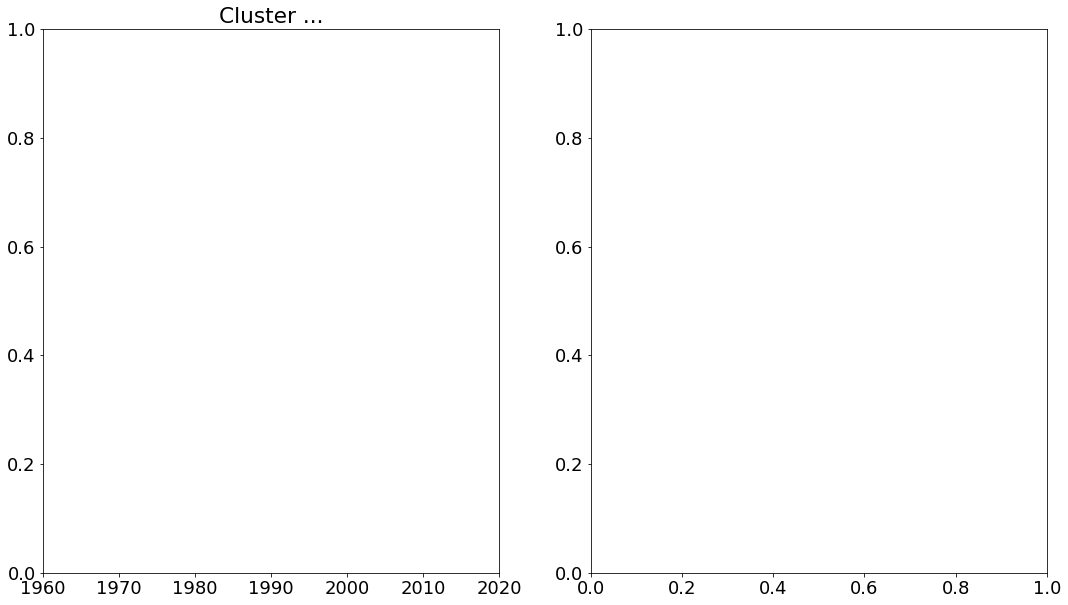

In [315]:
fig,ax = pl.subplots(1,2, figsize=(18,10))

ax[0].set_title("Cluster ...")
ax[0].set_xticks(range(0,70,10))
ax[0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0].plot(pop_standard[c[1] == 0 ].T);
ax[0].legend(labels=pop_df_clean.loc[c[1] == 1].index)

ax[1].set_title("Cluster ....")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1].plot(pop_standard[c[1] == 1 ].T);
# placing legend method via https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/
ax[1].legend(labels=pop_df_clean.loc[c[1] == 2].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')


*Can you do some library research to figure out why those countries may cluster together?*

I can once I get the plots to work...

# Extra Credit: do it with anothe cluster method, agglomerative clustering or DBScan 